In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image,display
import warnings
warnings.filterwarnings('ignore')

# Differentiation Methods.

This notebook contains different numerical differentiation methods.

---

## First-Order Derivatives.

- The derivative of a function $f$ with respect to the variable $x$ is given by

    $$\frac{\text{d}f(x)}{\text{d}x}=\lim_{h\to0}\frac{f(x+h)-f(x)}{h},$$

- Implementing a derivative on a computer consists of taking a small but nonzero value of $h$:

    $$\frac{\text{d}f(x)}{\text{d}x}\simeq\frac{f(x+h)-f(x)}{h},$$

    which is known as the forward difference since the derivative is evaluated by shifting the argument forward.

- However, it is equally correct to evaluate the backward derivative:

    $$\frac{\text{d}f(x)}{\text{d}x}\simeq\frac{f(x)-f(x-h)}{h},$$

    which in most cases gives approximately the same result when $h$ is small.

- Exceptions are functions with a discontinuity at $x$ or when $x$ corresponds to a boundary point.


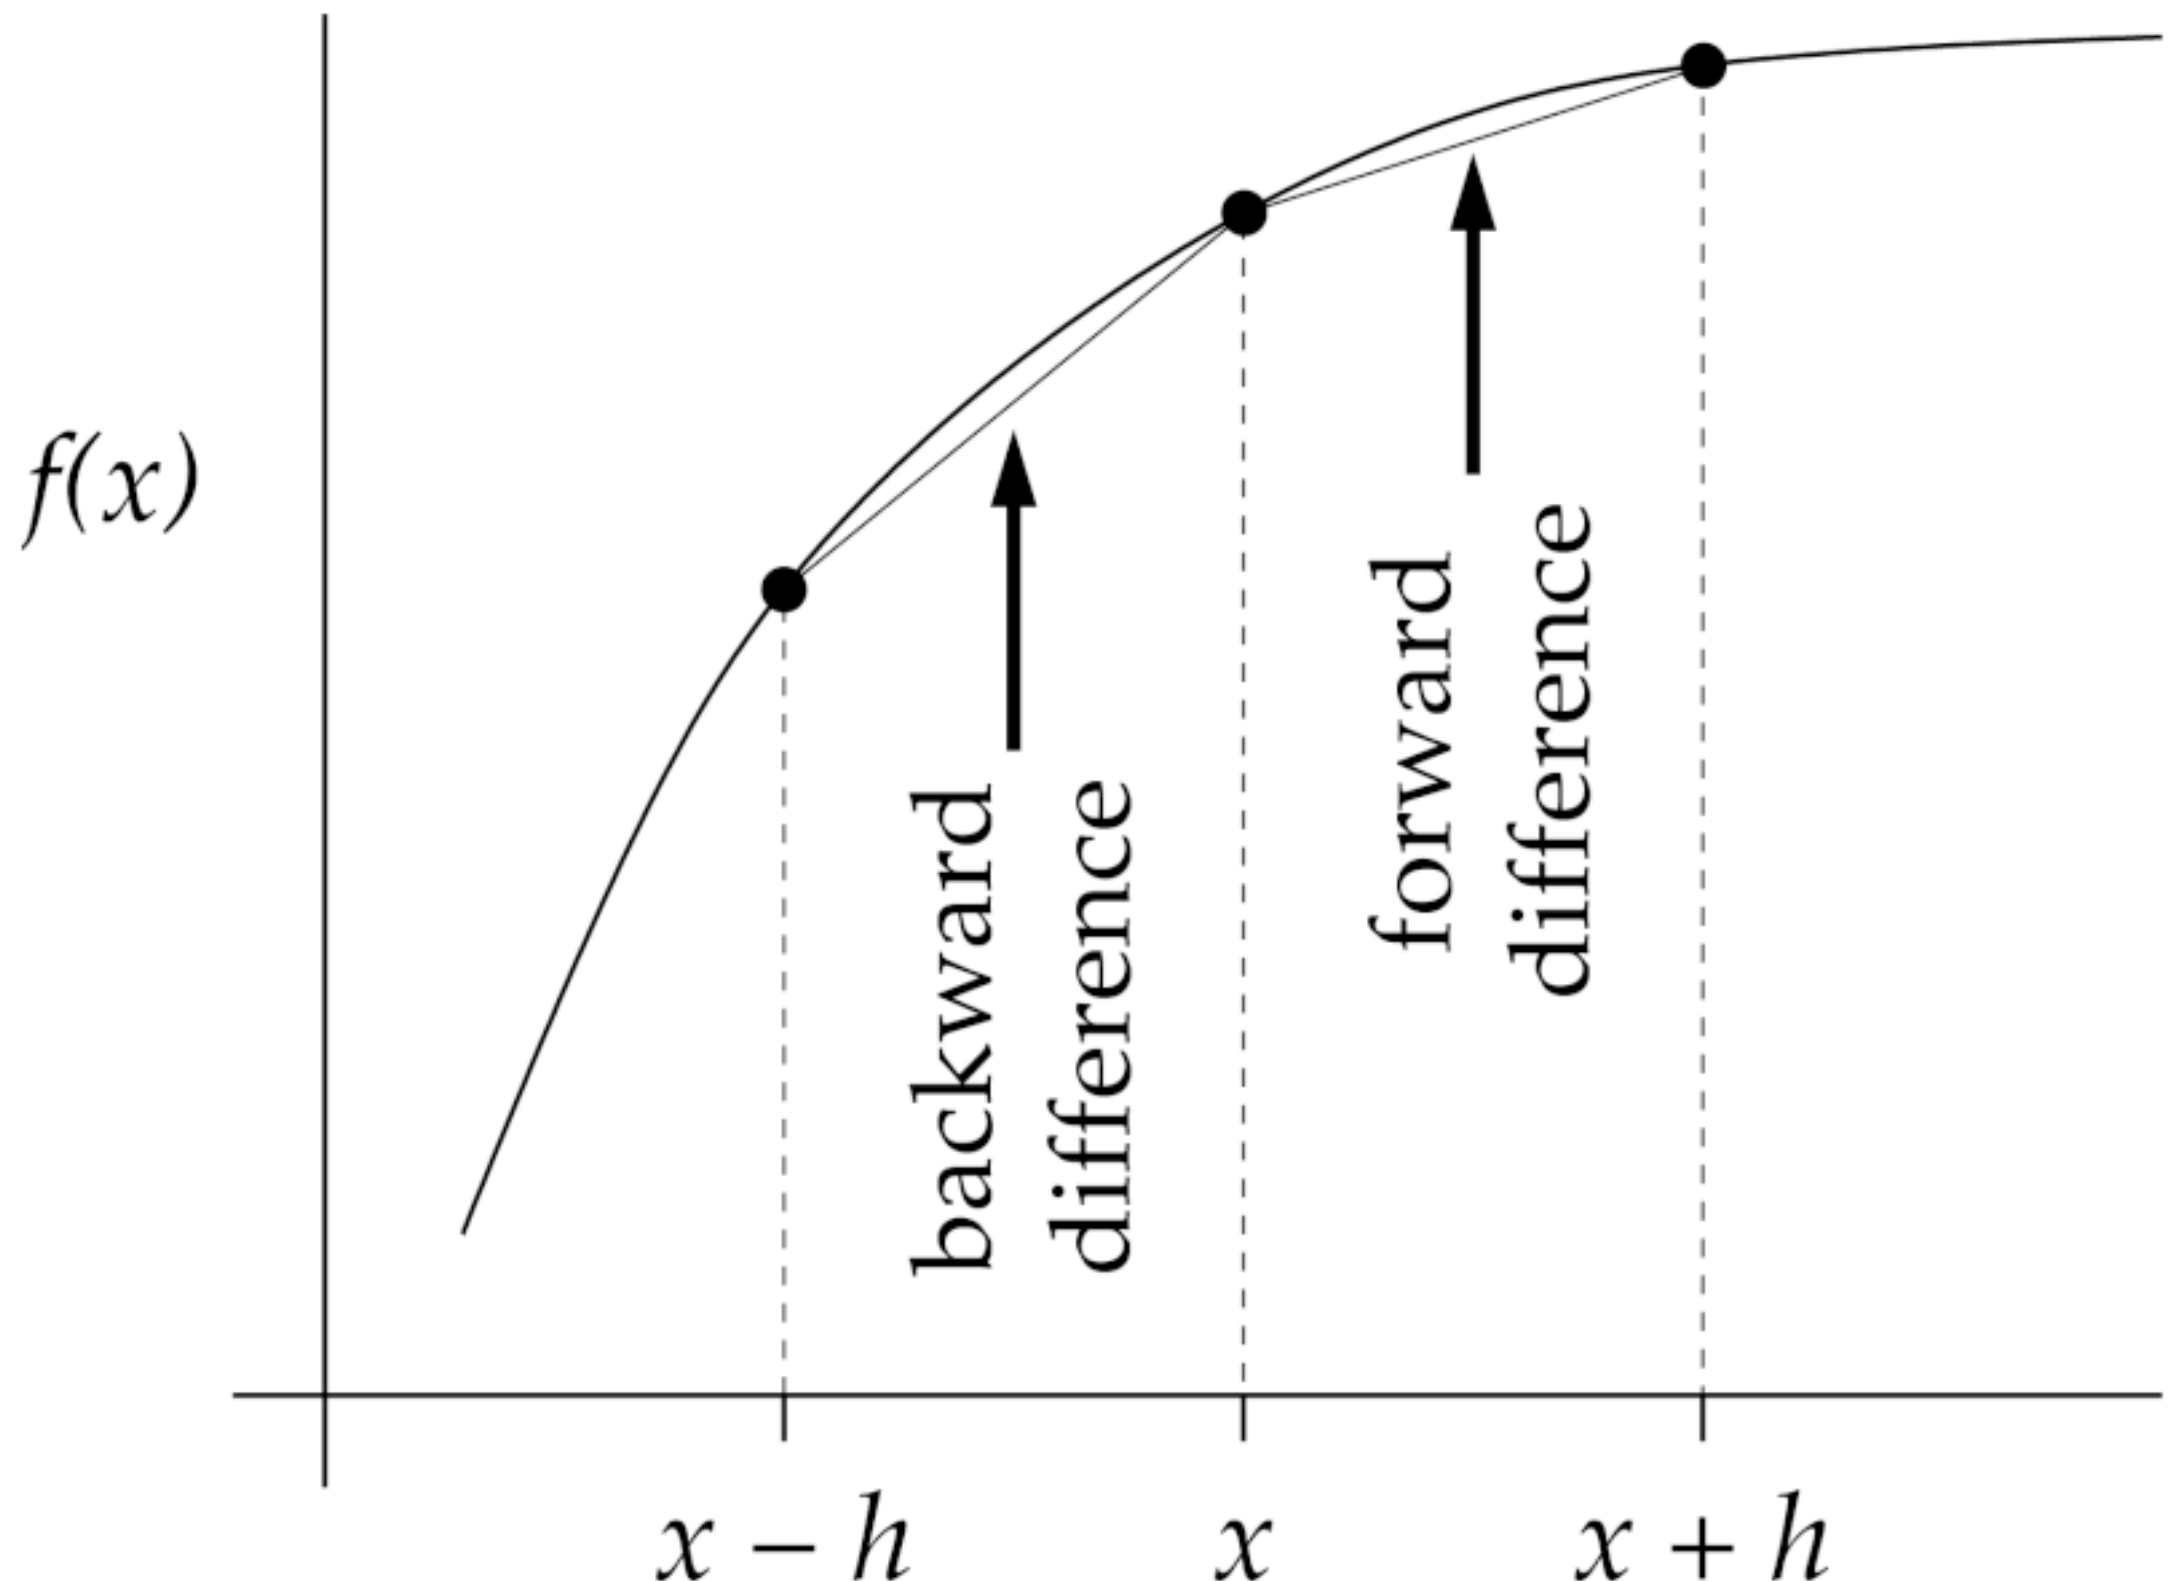

In [2]:
from IPython.display import Image,display
display(Image(filename="derivada_back_forth.png", width=500, height=500))

- The total error (the sum of truncation and rounding errors) as a function of $h$ is:

    $$\epsilon(h)\simeq\frac{\epsilon_M}{h}\sqrt{2}\,\vert f(x)\vert+\frac{1}{2}h\,\vert f''(x)\vert,$$

    which, by differentiating with respect to $h$, allows us to obtain the value that minimizes the total error, $h_\text{opt}$:

    $$h_\text{opt}=\left( 2\sqrt 2\,\epsilon_M\left\vert\frac{f(x)}{f''(x)}\right\vert\,\right)^{1/2}\sim 10^{-8},$$

    for which the error is:

    $$\epsilon_\text{min}=\epsilon\,(h_\text{opt})=h_\text{opt}\vert f''(x)\vert=\left(2\sqrt 2\,\epsilon_M\left\vert f(x)\,f''(x)\right\vert\,\right)^{1/2}\sim10^{-8},$$

---

## Central/Centered Differences.

- Expanding the Taylor series $h/2$ forward and $h/2$ backward to a higher order and subtracting them, we obtain:

    $$f'(x)=\frac{f(x+h/2)-f(x-h/2)}{h}-\frac{1}{24}h^2\,f'''(x)+....,$$

    which reduces the truncation error to $\frac{1}{24}h^2\,f'''(x)$, corresponding to

    $$h_\text{opt}=\left( 12\sqrt 2\,\epsilon_M\left\vert\frac{f(x)}{f''(x)}\right\vert\,\right)^{1/3}\sim 10^{-5},$$

    and a minimum error

    $$\epsilon_\text{min}=\frac{1}{8}h_\text{opt}^2\vert\,f'''(x)\vert=\left(\frac{9}{16}\,\epsilon_M^2\left\vert f(x)^2\,f''(x)\right\vert\,\right)^{1/3}\sim10^{-10},$$

---

### Example: computing derivatives.

Given the function $f(x)=1+\frac{1}{4}\,\tanh(4x)$:

1. Compute the derivative of the function over the interval $-1\le x\le1$ using forward, backward, and central differences.  
2. Compute the analytical derivative and plot all four curves on the same figure.

---



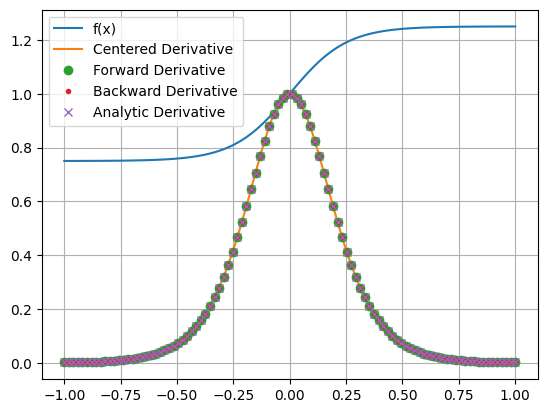

In [3]:
def f(x):
    return 1 + np.tanh(4*x)/4


def derivative(f, x, method = 'centered'):
    """Derivates a given function f in an interval given by x.

    Args:
        f (function): regular math function
        x (list): list or array-like to derivate the function f in.
        method (str, optional): Determines whether to use the forward, backward or centered method to derivate with. Defaults to 'centered'.

    Returns:
        list: list of y-axis points that represent the first derivative of f(x).
    """
    assert(method in ['centered', 'forward', 'backward'])

    if method == 'centered':
        h = 1e-5
        return [(f(xp + h/2) - f(xp - h/2))/h for xp in x]
    if method == 'forward':
        h = 1e-8
        return [(f(xp + h) - f(xp))/h for xp in x]
    if method == 'backward':
        h = 1e-8
        return [(f(xp) - f(xp - h))/h for xp in x]
    
def df(x):
    return 1/np.cosh(4*x)**2

x = np.linspace(-1, 1, 100)
y = f(x)

y1_centered = derivative(f, x)
y1_forward = derivative(f, x, 'forward')
y1_backward = derivative(f, x, 'backward')
y1_analytic = df(x)

plt.plot(x, y, label = 'f(x)')
plt.plot(x, y1_centered, '', label = 'Centered Derivative')
plt.plot(x, y1_forward, 'o', label = 'Forward Derivative')
plt.plot(x, y1_backward, '.', label = 'Backward Derivative')
plt.plot(x, y1_analytic, 'x', label = 'Analytic Derivative')
plt.grid()
plt.legend()
plt.show()

## Second-Order Derivatives.

- The second derivative is the derivative of the first derivative. Taking, for example, the centered difference:

    \begin{align}
    f''(x)\simeq& \frac{f'\left(x+\frac{h}{2}\right)-f'\left(x-\frac{h}{2}\right)}{h}\\
    =&\frac{\left(f(x+h)-f(x)\right)/h-\left(f(x)-f(x-h)\right)/h}{h}\\
    =&\frac{f(x+h)-2f(x)+f(x-h)}{h^2},
    \end{align}

  which is the simplest approximation for the second derivative.

* Once again, the value of $h$ that minimizes the error can be computed:

    $$h_\text{opt}=\left(24\epsilon_M\left\vert\frac{f(x)}{f^{(iv)}}\right\vert\,\right)^{1/4}\sim10^{-4},$$

* The accuracy decreases as the order of the derivative increases.

---


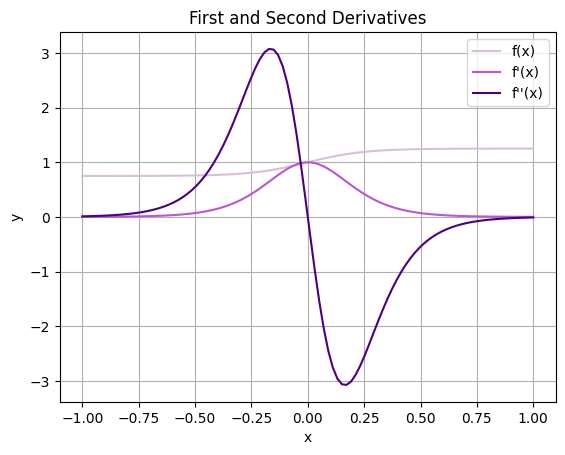

In [4]:
def second_derivative(f, x):
    """Returns the second derivative of a function in a given interval using the centered differences method.

    Args:
        f (function): function that is given an array-like as x.
        x (list): list or np.array to derivate f in.

    Returns:
        list: numeric data for the second derivative of the function f in the interval x.
    """
    h = 1e-4
    return [(f(xp + h) - 2*f(xp) + f(xp - h))/h**2 for xp in x]


y2 = second_derivative(f, x)

plt.plot(x, f(x), label = 'f(x)', color = 'thistle')
plt.plot(x, derivative(f, x), label = 'f\'(x)', color = 'mediumorchid')
plt.plot(x, second_derivative(f, x), label = 'f\'\'(x)', color = 'indigo')
plt.title('First and Second Derivatives')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

## Derivatives of Noisy Data.

Imagine we have measurements of a certain quantity with noise, which can be either statistical or systematic. This is usually the typical case in an experiment where, although an underlying functional form is apparent, it is accompanied by random fluctuations. The problem now arises when we want to estimate the derivative of such data.

---

### Example: derivatives with noise.

Given an arbitrary function $f$, the following code allows adding random Gaussian noise to it.

---


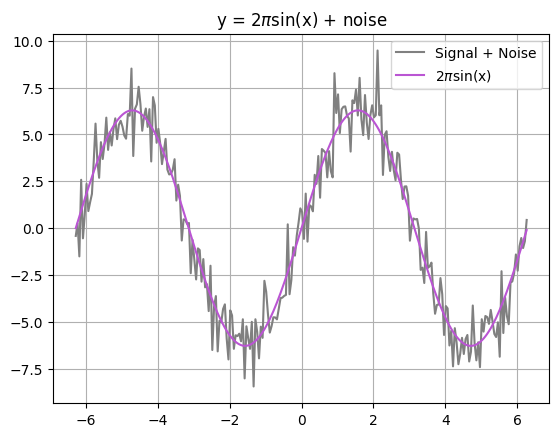

In [5]:
def corr_vars(start, stop, step, mu, sigma, f):
    """Adds random noise to a function's data."""

    x = np.arange(start, stop, step)   
    e = np.random.normal(mu, sigma, x.size)
    y = np.zeros(x.size)

    for k in range(x.size):
        y[k] = f(x[k]) + e[k]
    
    return x,y

np.random.seed(2)

p = math.pi
x, y = corr_vars(-2*p, 2*p, 0.05, 0,1, f=lambda x: 2*p*np.sin(x))  

plt.plot(x, y, label = 'Signal + Noise', color = 'gray')
plt.plot(x, 2*p*np.sin(x), "r", label = '2$\pi$sin(x)', color = 'mediumorchid')
plt.title('y = 2$\pi$sin(x) + noise')
plt.grid()
plt.legend()
plt.show()

The following code allows computing the derivative of the noisy signal.

---


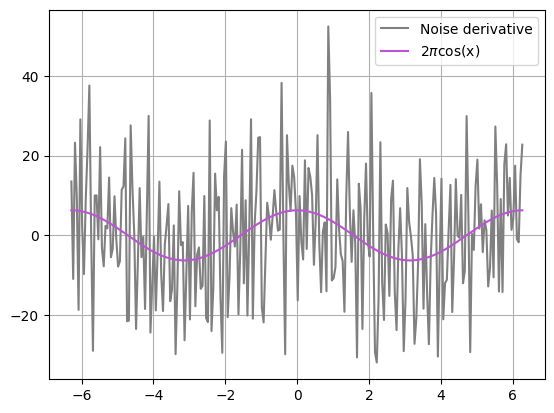

In [6]:
dfn = [(y[1] - y[0])/(x[1] - x[0])]
for i in range(1, x.size-1):
    dfn.append((y[i+1] - y[i-1])/(x[i+1] - x[i-1]))
dfn.append((y[x.size-1] - y[x.size-2])/(x[x.size-1] - x[x.size-2]))

plt.plot(x, dfn, label = 'Noise derivative', color = 'gray')
plt.plot(x, 2*np.pi*np.cos(x), label = '2$\pi$cos(x)', color = 'mediumorchid')
plt.grid()
plt.legend()
plt.show()